### Imports etc

In [2]:
# !pip install pyarrow  # to load parquet file
# !pip install statsmodels  # to run crosscorrelation function
from utils import *  # help file with all functions etc.

FREQ = '5S'

df = load_raw_data()

ERROR: Invalid requirement: '#'


Directly load parquet file fast. 


ERROR: Invalid requirement: '#'


# Q1

While analyzing this problem, you should be aware that there is probably a need to fill in data when it was not streamed. Note that some sensors only give data if they have something interesting to say because they measure a (sufficient) difference from the previous value or a value that is not what it should be. Other sensors only respond when prompted. Indicate how you filled in the ‘missing’ data for such sensors. Explain your method, why you believe it is the most suitable for the given sensors, and what alternatives you considered.

### Get some statistics

In [3]:
df

,Tag,TS,avg,UoM
0,XZWH6517900,2020-06-12 00:00:00,86.91900,percentage
1,NLFD6046949,2020-06-12 00:00:00,6.87600,pressure
2,OLGF7428100,2020-06-12 00:00:00,10.52000,temperature
3,VKBD2463131,2020-06-12 00:00:00,25.41540,temperature
4,WJTY3058662,2020-06-12 00:00:00,17.55760,flow
...,...,...,...,...
447511,OGXF8790955,2020-06-13 23:59:55,726.23070,flow
447512,YQIV8384792,2020-06-13 23:59:55,564.99240,flow
447513,ACSH9824768,2020-06-13 23:59:55,14.05650,flow
447514,FRSE9448289,2020-06-13 23:59:55,7.00550,flow


In [4]:
df_stats = get_stats(df)
df_stats.head(20)

,Tag,UoM,Count,Diffs,Nr_Diffs
0,CCUA4846210,flow,24168,0 days 00:00:05 17130 0 days 00:00:10 4...,10
1,NLFD6046949,pressure,23681,0 days 00:00:05 18450 0 days 00:00:10 3...,32
2,IBCD9076387,temperature,20426,0 days 00:00:05 16219 0 days 00:00:10 2...,64
3,BCNT5607274,current,19687,0 days 00:00:05 16960 0 days 00:00:10 2...,99
4,CJYY7281535,pressure,19299,0 days 00:00:05 14503 0 days 00:00:10 2...,56
5,XZWH6517900,percentage,18761,0 days 00:00:05 15404 0 days 00:00:10 1...,55
6,KUBF4965544,0,18558,0 days 00:00:05 17448 0 days 00:00:10 ...,109
7,ITPL9140030,percentage,14357,0 days 00:00:05 11464 0 days 00:00:10 1...,104
8,YQIV8384792,flow,13586,0 days 00:00:05 9901 0 days 00:00:10 207...,112
9,WJTY3058662,flow,13351,0 days 00:00:05 9539 0 days 00:00:10 169...,102


### Interpolate one sensor as example

In [6]:
first_sensor = df_stats.iloc[0]['Tag']
first_sensor

'CCUA4846210'

In [7]:
df_first_inter = interpolate_sensor(df, first_sensor, freq=FREQ)
df_first_inter

,avg
2020-06-12 00:00:00,84.27450
2020-06-12 00:00:05,78.04725
2020-06-12 00:00:10,83.14800
2020-06-12 00:00:15,66.72600
2020-06-12 00:00:20,77.24625
...,...
2020-06-13 23:59:40,104.94325
2020-06-13 23:59:45,101.91200
2020-06-13 23:59:50,98.88075
2020-06-13 23:59:55,92.57925


Look at plot before and after interpolation.

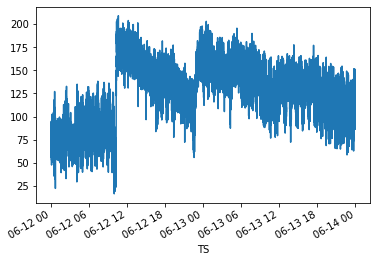

In [6]:
df[df['Tag'] == first_sensor].set_index('TS')['avg'].plot();

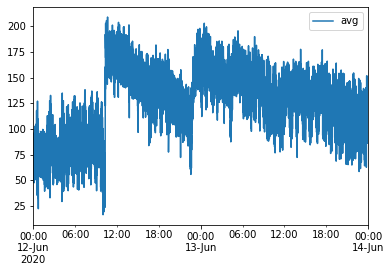

In [7]:
df_first_inter.plot();

# Q2

Some sensors may respond immediately to a change in a setting (e.g., the spinning frequency of a motor) while others may have a longer response time (e.g., the temperature of the product when the temperature setting of a heat exchanger has been changed). Can you determine the response times of the different sensors? Please explain precisely how you define the response time.

Ik denk dat we hier iets moeten doen met de helling (afgeleide) oid, want dan kan je zien hoe snel de waardes stijgen of dalen wat een reactie kan zijn op het verzetten van een setting. 

In [8]:
df_first_inter = get_derivative(df_first_inter)

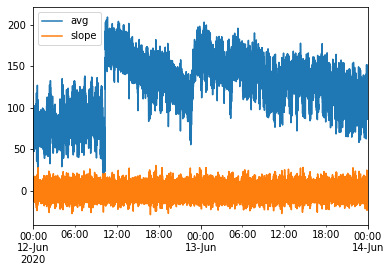

In [9]:
df_first_inter.plot();

Wanneer je hier sampled op 5 minutes (5T), dan zie je bij deze sensor dat de afgeleide hoog is op het moment dat de waardes zelf ook hard stijgen/dalen. Bij samplen op bv. 5S zie je dit een stuk minder goed (kan je wiskundig misschien wel goed laten zien). 

Manier van resamplen klopt nu alleen nog niet helemaal. Nu pakt 'ie de waarde om de 5 minutes, terwijl hij dan eigenlijk een gemiddelde oid zou moeten pakken. 

# Q3

Because the product has to flow through the line, the sensor responses are expected to show correlations with each other. However, there will be a certain time delay between the sensor data relative to each other. The suggested way to extract this delay is to correlate the data sequences and find the time shift that achieves the highest correlation (there may be other ways). How are the sensors correlated and what are the relative time delays? What are the relative time delays of the actual physical disturbances of the product flow? Note that for the latter question, the answer to Question 1 may affect your result. Also note that the dataset has a high time resolution. This emphasizes high frequency fluctuations, which may make it difficult to find the correlations of sensors that are further apart and therefore have a larger lag. Please report if you find wildly unlikely results and suspect that time stamps were incorrect (can this be corrected?).

Summary APs for Q3:
* Correlate sensors and fine the time shift that achieves the highest correlation;
    * So map how which two sensors are correlated and on which lag they are correlated the most.
* What are the relative time delays when physical disturbances happen? (Ik denk je dit kan meten ahv antwoord Q2)


General note: High time resolution dataset and therefore there are probably high frequency fluctuations. Sensors that are far apart probably have a large time lag. 

## Input from Melvin

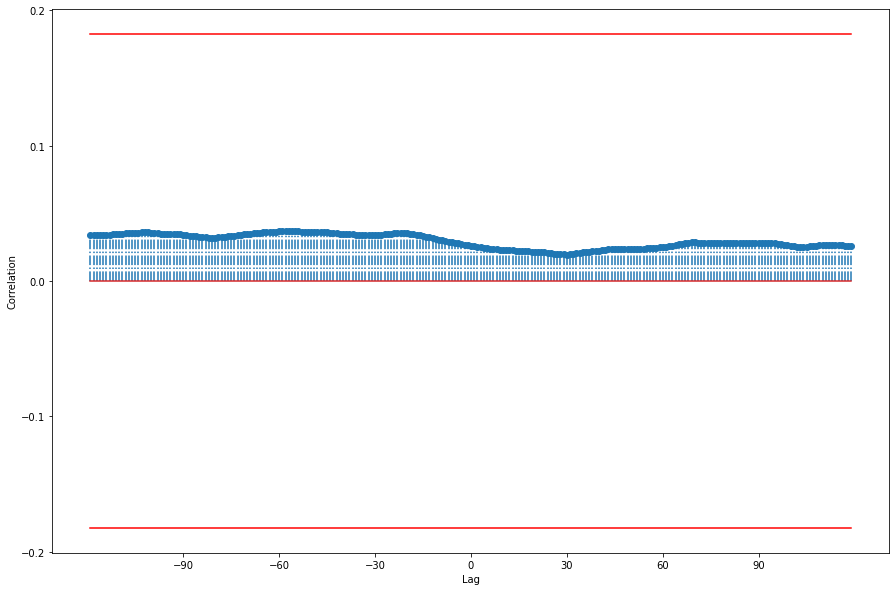

In [10]:
sensors = ['CCUA4846210', 'RYSR5117035']
output = corr_two(input_sensors = sensors, 
         frame = df,
         max_lags = int(600/int(FREQ[:-1])),  # take 600 seconds (10 minutes), divide this by the number of seconds resampled on to get a good number of lags
        )

In [ ]:
# add function to get the highest correlation per sensor pairs --> determine the lag where this correlation arises.
output